In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix , r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import itertools

C:\Users\adler_000\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('C:\\Users\\adler_000\\Documents\\Ronen\Data Science\\bezeq.csv') # reading the data frame
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
## Let's see the basic statistical description of our dataset
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Conclusion from the description:
1. There are equal amount of observations, so if there is a null value in one of them, there is one in all of them. We will check it soon.
2. The means vary, so we will need to scale the values prior to classification
3. Variables X8 and X5 have a very low standard deviation, so they will contribute very little to our classification, if any. IF the dataset was larger, I would consider exclude them from our model

In [4]:
## checking for missing value
df['x1'].isnull().any()

False

Now we should decide how do we classify y. We should see the variable's values

In [5]:
df['y'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: y, dtype: int64

At this stage, we see that there are only 5 observations out of 6500, so not much can be predicted about the value 9 and i choose to remove it

In [6]:
df.drop(df[df.y==9].index,inplace = True)
df['y'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
Name: y, dtype: int64

Let's look at the histogram of our target variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBD32E7C88>]], dtype=object)

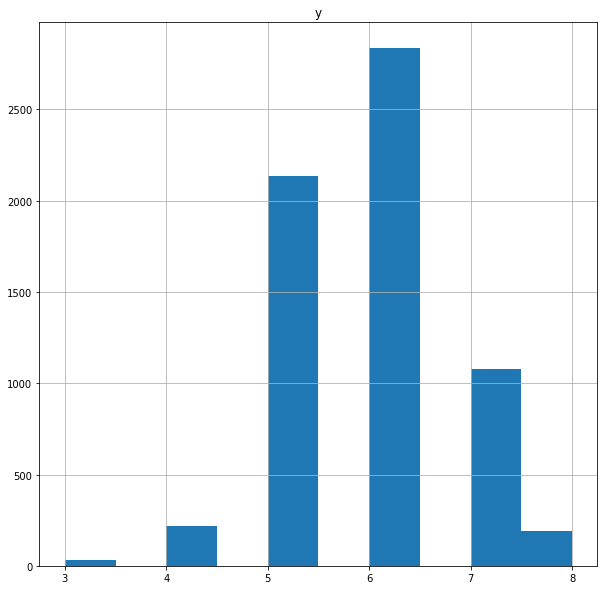

In [7]:
% matplotlib inline
df.hist(column = 'y', figsize =(10,10))

In this case, we should decide between two possible options:
1. Y has multiple values, and it can be predicted using a regression classifier
2. Y has ONLY 6 values, so it can be predicted using classification algorithms

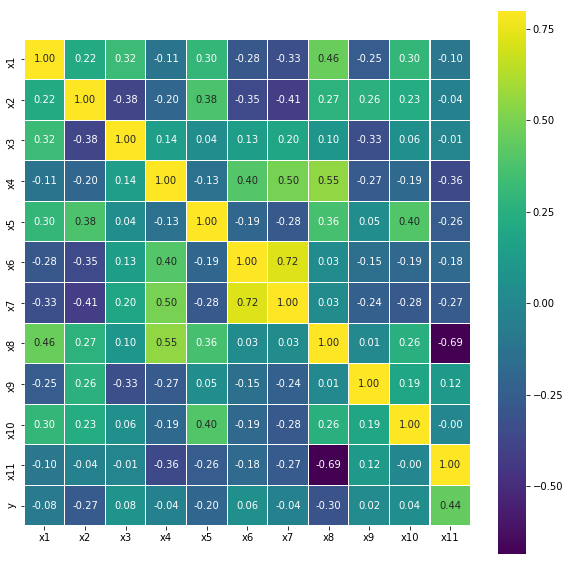

In [8]:
## checking correlations between variables
% matplotlib inline
corr = df.corr()
colormap = plt.cm.viridis
corr = corr.drop(['y'], axis =1)
fig = plt.figure(figsize =(10,10))
sns.heatmap(corr,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

X7 and X6 are somehow correlated. X11 and X8 are negatively correlated but none of them is high enough to get rid of.

In [9]:
## Let's prepare the data set for the modevl. 
y_lab = df['y']
class_names = y_lab.unique()
#Turning the problem into a multi class problem
x_lab = df.drop('y',axis = 1) #splitting the  data into X and Y where y is the predicted value
min_max_scaler = MinMaxScaler()
## now let's split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(x_lab, y_lab, test_size=0.25, random_state=324) 
x_lab = min_max_scaler.fit_transform(x_lab) # scaling the 

At this stage, we will split the problem into regression, and classification.
For the regression problem, we will test the folowing models: Linear regression, SVM with linear kernel, and SVM with Radial Base kernel. We will plot the results and see how the models perform

Coefficients: 
 [  6.41737206e-02  -1.24097062e+00  -8.92763594e-02   4.36312011e-02
  -4.79474528e-01   5.62028684e-03  -2.30610514e-03  -5.68164522e+01
   3.78236298e-01   7.94619560e-01   2.58931688e-01]
Mean squared error: 0.55
Variance score: 0.31


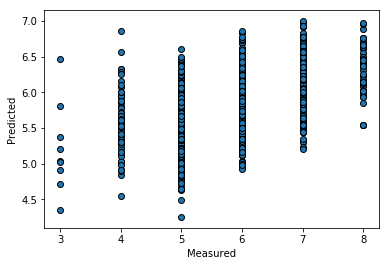

In [10]:
## Linear regression
#Instantiating the classifier
regr = LinearRegression()
# fitting the data
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.show()

The results of the linear regression model are not bright as we can see in the plotted graph. In addition, R squared is not very high, so it means a that the scattering is high. At this stage, it is better to look at the different models.
Let's try to run few classification models

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.show()

The results of the linear regression model are not bright as we can see in the plotted graph. In addition, R squared is not very high, so it means a that the scattering is high. At this stage, it is better to look at the different models.
Let's try to run few classification models

For model Decision Tree, the cross valudation score is 0.53173
The accuracy score for the model Decision Tree is 0.52988
Confusion matrix, without normalization


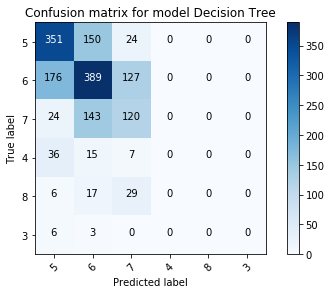

For model Random Forest, the cross valudation score is 0.61388
The accuracy score for the model Random Forest is 0.61491
Confusion matrix, without normalization


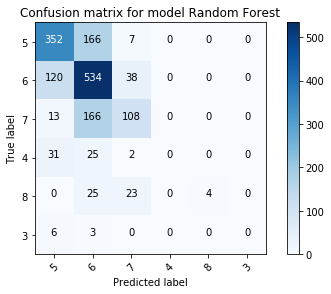

For model KNN, the cross valudation score is 0.59643
The accuracy score for the model KNN is 0.61429
Confusion matrix, without normalization


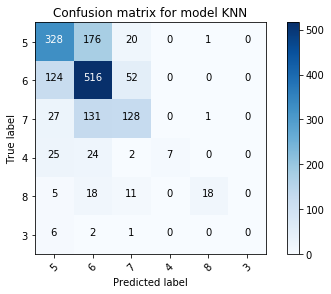

For model Logistic Regression, the cross valudation score is 0.53399
The accuracy score for the model Logistic Regression is 0.54097
Confusion matrix, without normalization


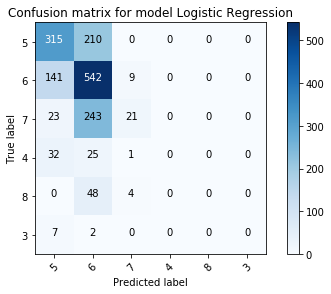

For model Linear SVM, the cross valudation score is 0.41713
The accuracy score for the model Linear SVM is 0.45348
Confusion matrix, without normalization


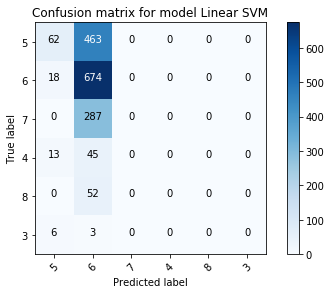

For model XGBoost, the cross valudation score is 0.65599
The accuracy score for the model XGBoost is 0.67899
Confusion matrix, without normalization


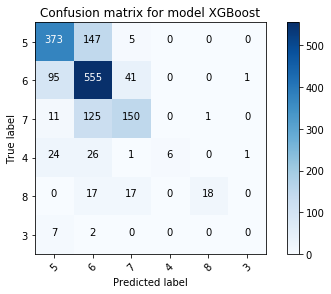

In [13]:
## instantiating the two SVM kernels and possible cross validation parameters

models = ['Decision Tree','Random Forest','KNN', 'Logistic Regression','Linear SVM','XGBoost'] 
classifiers = {DecisionTreeClassifier(max_leaf_nodes=15) : {} ,
RandomForestClassifier(random_state=3):   {'n_estimators':[100],
            'max_depth':[10],
            'max_features':[0.75],
            'min_samples_split':[11]},
KNeighborsClassifier():{'n_neighbors':range(15,30), 
              'p':[1,2],
              'weights':['uniform','distance']},
              LogisticRegression(random_state=3):{'C':[0.8,0.9,1],'penalty':['l1','l2']},
              LinearSVC(random_state = 3) : { 'C':[0.8,0.9,1]},xgb.XGBClassifier():{'n_estimators':[900,1000,1100],
            'learning_rate':[0.01],
            'max_depth':[8],
            'min_child_weight':[1],
            'subsample':[0.8],
            'colsample_bytree':[0.3,0.4,0.5]}}


for model, classifier , value in zip(models,classifiers.keys(),classifiers.values()):
            clf = GridSearchCV(estimator = classifier,param_grid = value,cv=5, scoring="accuracy", n_jobs= -1)
            clf.fit(X_train,y_train)
            best = clf.best_estimator_
            y_pred =best.predict(X_test)
            print ('For model %s' %model+ ', the cross valudation score is %.5f'% clf.fit(X_train,y_train).best_score_)  
            print ('The accuracy score for the model %s' % model + ' is %.5f' %accuracy_score(y_test.as_matrix(),y_pred))
            cm = confusion_matrix(y_test, y_pred, labels = class_names)
            plot_confusion_matrix(cm,class_names, title = 'Confusion matrix for model %s' %model) 
            plt.show()

# Summary

The problem is better solved as a clasification problem rather than regression problem. 
I was contemplating between the two options. Looking at the target Y, you see that the distribution of values leaves very few obervations on the value  9 and it can be dropped.

I was looking if there are null values in the data set and then examined the correlations. If the data set was larger, some observations could have been considered irrelevant due to high correlation and low variance, but since we are talking about fairly small number of observations, I decided to discard them.

To prepare the data, I scaled it first using MinMaxScaler and then split it train and test sets.

I ran linear regression and came up to the conclusion that since R squared is 0.31, the variance can be poorly explained from the model and therefor it is not good.

I tried to model the problem with few classification models. First, I optimized the models using GridSearchCV and got a cross validation score, tood the best model and trined it. Then I got the accuracy score and the confusion matrix.

We see that the results vary between models, so just the cross validation and accuracy scores are not enough.
If I look at the confusion matrices and since I don't realize what this data means, I will choose the model which gives us better true positive score in the values that are more common which are 5 and 6. In our case, it will be Random forest.
Thanks



